In [79]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [80]:
def image_hist(img, normalized=True):
  m, n = img.shape
  h = np.zeros(256)
  
  for i in range(m):
    for j in range(n):
      h[img[i][j]] += 1
      
  if normalized:
    return np.array(h) / (m * n) 
  
  return np.array(h)

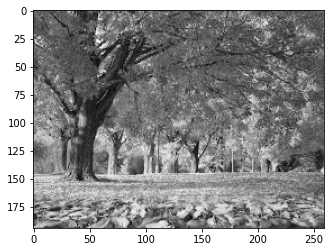

In [81]:
gray_img = plt.imread('gray_test.jpg')
plt.imshow(gray_img, cmap='gray');

# Piecewise-Linear Transformation Functions

## Contrast Stretching

Contrast Stretching is a process that expands the range of intensity levels in an image so that it spans the full intensity range of the recording medium or display device.

_source: Digital Image Processing Book, 3rd Edition_

$ y = \left\{
\begin{array}{ll}
    \alpha x & 0 \leq x < a \\
    \beta (x - a) + y_a & a \leq x < b \\
    \gamma (x - b) + y_b & b \leq x < L \\
\end{array} 
\right. $

In [82]:
def contrast_stretching(gray_img, a=100, b=200, s1=50, s2=200):
  alpha = (s1 / a)
  beta = ((s2 - s1)/(b - a))
  gamma = ((255 - s2) / (255 - b))

  m, n = gray_img.shape
  stretched = np.zeros_like(gray_img)
  
  for i in range(m):
    for j in range(n):
      pix = gray_img[i, j]
      
      if 0 <= pix < a:
        stretched[i, j] = alpha * pix
      if a <= pix < b:
        stretched[i, j] = beta * (pix - a) + s1
      else:
        stretched[i, j] = gamma * (pix - b) + s2
        
  return stretched

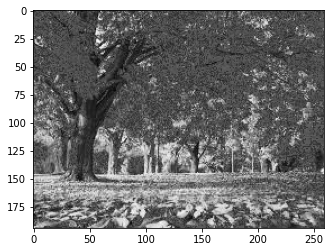

In [83]:
gray_stretched = contrast_stretching(gray_img)
plt.imshow(gray_stretched, cmap='gray');

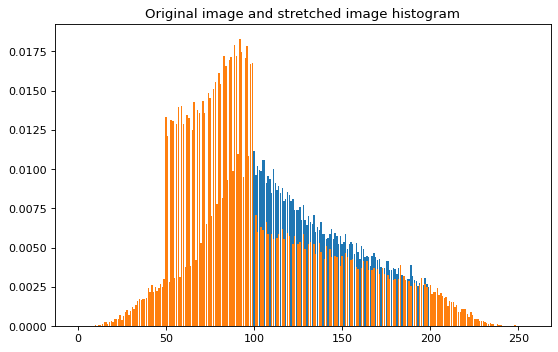

In [84]:
plt.figure(figsize=(8, 5), dpi=80)

plt.title("Original image and stretched image histogram")

plt.subplot(111)
hist = image_hist(gray_img)
plt.bar(range(0, 256), hist);

plt.subplot(111)
st_hist = image_hist(gray_stretched)
plt.bar(range(0, 256), st_hist);

## Clipping

$ y = \left\{
\begin{array}{ll}
    \alpha x & 0 \leq x < a \\
    \beta (x - a) & a \leq x < b \\
    \beta (b - a) & b \leq x < L \\
\end{array} 
\right. $

In [99]:
def clipping(gray_img, a=50, b=150):
  
  beta = 2

  m, n = gray_img.shape
  clipped = np.zeros_like(gray_img)
  
  for i in range(m):
    for j in range(n):
      pix = gray_img[i, j]
      
      if 0 <= pix < a:
        clipped[i, j] = 0
      if a <= pix < b:
        clipped[i, j] = beta * (pix - a)
      else:
        clipped[i, j] = beta * (b - a)
        
  return clipped

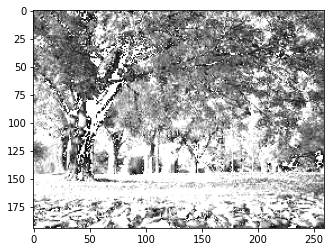

In [100]:
gray_clipped = clipping(gray_img)
plt.imshow(gray_clipped, cmap='gray');

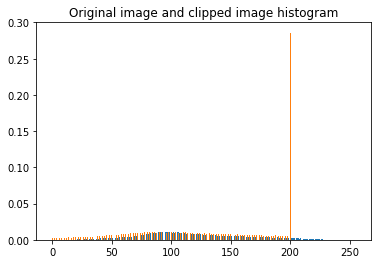

In [103]:
### plt.figure(figsize=(8, 5), dpi=80)

plt.title("Original image and clipped image histogram") # is it good

plt.subplot(111)
hist = image_hist(gray_img)
plt.bar(range(0, 256), hist);

plt.subplot(111)
cl_hist = image_hist(gray_clipped)
plt.bar(range(0, 256), cl_hist);